In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import huffman
import keras
from math import ceil
import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
def runlength_encode(data):
    out = []

    cnt = 1
    for i in range(1, len(data)):
        if data[i] == data[i-1]:
            cnt += 1
            continue
        
        out.append(data[i-1])

        if cnt != 1:
            out.append(data[i-1])
            out.append(cnt)
            cnt = 1
    
    if cnt == 1:
        out.append(data[-1])
    else:
        out.append(data[-1])
        out.append(data[-1])
        out.append(cnt)
    
    return out


def filter_row(img):
    out = img.copy()
    H, W = img.shape

    for h in range(H):
        for w in range(1, W):
            out[h, w] = img[h, w] - img[h, w-1]    
    
    return out

def filter_column(img):
    out = img.copy()
    H, W = img.shape

    for h in range(1, H):
        for w in range(W):
            out[h, w] = img[h, w] - img[h-1, w]    
    
    return out

In [4]:
# print(len(np.unique(filter_row(sample))))
# print(len(np.unique(sample)))

# print(len(runlength_encode(sample.ravel())))
# print(len(runlength_encode(np.rot90(sample).ravel())))

# tmp = runlength_encode(sample.ravel())
# huff = huffman.HuffmanCoding()
# res = huff.encode(tmp)


In [5]:
ans = [3, 3, 3, 0, 0, 6, 2, 3, 5, 5, 5, 4, 4, 3, 3, 0, 0, 10]
data = [3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 3, 5, 5, 5, 5, 5, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

assert runlength_encode(data) == ans

In [6]:
sample = x_train[40000, :, :]
sample2 = x_train[3, :, :]
cv2.imwrite("sample.png", sample)

True

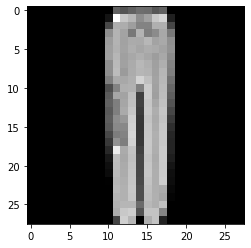

In [25]:
plt.imshow(x_train[1000, :, :], cmap="gray")


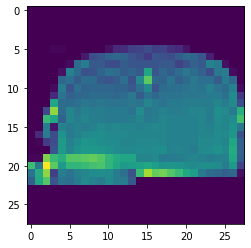

In [8]:
plt.imshow(x_train[y_train == 8][10])

In [9]:
def compare(img):
    # Runlength and huffman
    img_ = img.copy()
    run_enc = runlength_encode(img_.ravel())
    huff1 = huffman.HuffmanCoding()
    out1 = huff1.encode(run_enc)

    # Normal Huffman
    huff2 = huffman.HuffmanCoding()
    out2 = huff2.encode(img_.ravel())

    # Filter(sub) + runlength + huffman
    fil_img = filter_row(img_)
    huff3 = huffman.HuffmanCoding()
    run_enc2 = runlength_encode(fil_img.ravel())
    out3 = huff3.encode(run_enc2)

    # Filter(up) + runlength + huffman
    fil_img2 = filter_column(img_)
    huff4 = huffman.HuffmanCoding()
    run_enc3 = runlength_encode(fil_img2.ravel())
    out4 = huff4.encode(run_enc3)

    # Results
    out1_byte = ceil(len(out1) / 8)
    out2_byte = ceil(len(out2) / 8)
    out3_byte = ceil(len(out3) / 8)
    out4_byte = ceil(len(out4) / 8)
    out1_bpp = len(out1) / 28**2
    out2_bpp = len(out2) / 28**2
    out3_bpp = len(out3) / 28**2
    out4_bpp = len(out4) / 28**2
    

    # Comparison
    print("Runlength & Huffman: {} bytes, {} bpp".format(out1_byte, out1_bpp))
    print("Only Huffman: {} bytes, {} bpp".format(out2_byte, out2_bpp))
    print("Filter(sub) + runlength + huffman: {} bytes, {} bpp".format(out3_byte, out3_bpp), len(out3))
    print("Filter(up) + runlength + huffman: {} bytes, {} bpp".format(out4_byte, out4_bpp))




In [10]:
compare(smallest)

NameError: name 'smallest' is not defined

In [11]:
sample_rotated = np.rot90(sample)
compare(sample_rotated)

Runlength & Huffman: 205 bytes, 2.086734693877551 bpp
Only Huffman: 244 bytes, 2.4872448979591835 bpp
Filter(sub) + runlength + huffman: 230 bytes, 2.3443877551020407 bpp 1838
Filter(up) + runlength + huffman: 184 bytes, 1.8724489795918366 bpp


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in ubyte_scalars


In [12]:
# def clockwise(img):
    

In [13]:
def count_runlength(data, count):
    for i in range(60000):
        tmp_count = 0

        for j in data[i, :, :].ravel():
            if j == 0:
                tmp_count += 1
            elif j != 0 and tmp_count != 0:
                count.append(tmp_count)
                tmp_count = 0

        for k in np.rot90(data[i, :, :].ravel()):
            if k == 0:
                tmp_count += 1
            elif k != 0 and tmp_count != 0:
                count.append(tmp_count)
                tmp_count = 0

                
    # tmp_count = 0
    # for i in data.ravel():
    #     if i == 0:
    #         tmp_count += 1
    #     elif i != 0 and tmp_count != 0:
    #         count.append(tmp_count)
    #         tmp_count = 0
    
    return count

(array([23616498.,   477616.,   286907.,   191709.,   131597.,    96949.,
           75610.,    61138.,    52858.,    48514.,    46274.,    44886.,
           44885.,    46283.,    45735.,    46711.,    45039.,    47566.,
           46710.,    46971.,    47733.,    47792.,    48326.,    48138.,
           48987.,    49532.,    49848.,    50022.,    49935.,    50072.,
           51863.,    51011.,    52778.,    51508.,    53662.,    53381.,
           54386.,    53205.,    54569.,    54075.,    55591.,    55461.,
           54597.,    55734.,    54812.,    57583.,    56250.,    56629.,
           58381.,    56393.,    52756.,    62900.,    58471.,    58171.,
           57973.,    60289.,    58523.,    60188.,    59338.,    59099.,
           61320.,    60600.,    59640.,    58578.,    61588.,    61618.,
           61618.,    58991.,    63870.,    60733.,    63088.,    61540.,
           62224.,    63560.,    60593.,    65295.,    62925.,    63640.,
           64095.,    63593.,    64652

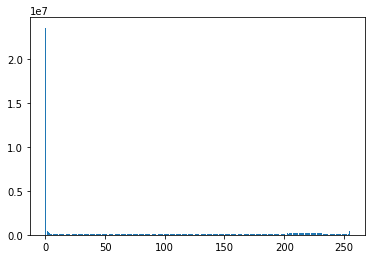

In [14]:
plt.hist(x_train.ravel(), bins=255, rwidth=0.8, range=(0, 255))

In [15]:
23616498 / (28 * 28 * 60000)

0.5020514030612245

In [16]:
from collections import defaultdict

def entropy(arr):
    # create histogram
    d = defaultdict(int)
    for i in arr:
        d[i] += 1

    ps = np.array(list(d.values())) / len(arr)
    etp = np.sum(list(map(lambda x: -1 * x * np.log(x), ps)))

    return etp
    

entropy(sample.ravel())

1.6005193197367038

In [17]:
entropy(runlength_encode(filter_row(sample).ravel()))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars


3.384207963850551

In [18]:
len(runlength_encode(filter_row(sample).ravel()))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars


247

6000

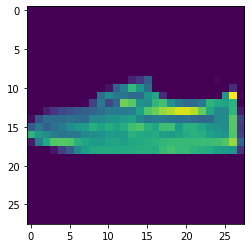

In [19]:
plt.imshow(sample)

len(x_train[y_train==1])

In [20]:
tmp = []
wariai = []
for i in range(60000):
    x = x_train[i, :, :]
    xr = runlength_encode(x.ravel())
    tmp += xr
    



In [21]:
np.array(tmp)

array([  0,   0,  96, ...,   0,   0, 225])

(array([4.576376e+06, 4.646280e+05, 1.343658e+06, 4.199720e+05,
        2.567320e+05, 1.890300e+05, 1.816210e+05, 1.803650e+05,
        1.924040e+05, 1.692820e+05, 1.559730e+05, 1.258910e+05,
        1.207030e+05, 1.159410e+05, 1.104020e+05, 1.053490e+05,
        1.025360e+05, 1.209170e+05, 1.041510e+05, 9.300900e+04,
        7.090200e+04, 5.884300e+04, 5.326600e+04, 5.018900e+04,
        4.987000e+04, 4.996300e+04, 5.000700e+04, 4.985300e+04,
        4.978100e+04, 5.029500e+04, 5.180300e+04, 5.087000e+04,
        5.272700e+04, 5.122500e+04, 5.325000e+04, 5.311100e+04,
        5.411600e+04, 5.320700e+04, 5.442700e+04, 5.389100e+04,
        5.524400e+04, 5.513500e+04, 5.428900e+04, 5.528700e+04,
        5.446900e+04, 5.716800e+04, 5.586200e+04, 5.625000e+04,
        5.797000e+04, 5.604000e+04, 5.238400e+04, 6.244500e+04,
        5.807600e+04, 5.779800e+04, 5.761000e+04, 5.992300e+04,
        5.845700e+04, 6.052800e+04, 5.935800e+04, 5.884100e+04,
        6.100600e+04, 6.032100e+04, 5.93

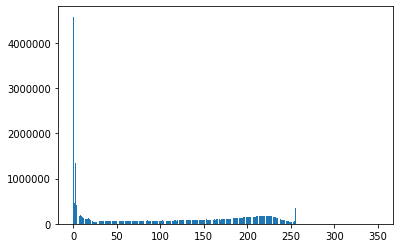

In [23]:
plt.hist(tmp, bins=350, rwidth=0.8, range=(0, 350))

In [ ]:
from collections import defaultdict

d = defaultdict(int)
for i in flat:
    d[i] += 1

d